In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.1
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.1
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [12]:
print(x_train.shape[1:])

(8,)


In [21]:
# 搭建deep模型
input = keras.layers.Input(shape=x_train.shape[1:])
print(input)
print('*'*50)
# input作为输入
hidden1 = keras.layers.Dense(30, activation='relu')(input)
# hidden1作为输入
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

concat = keras.layers.concatenate([input, hidden2])  # input是wide，hidden2是deep
output = keras.layers.Dense(1)(concat)  # 回归问题，最后输出一个值

# 然后定义model，放入input，output
model = keras.models.Model(inputs = [input],
                           outputs = [output])

model.summary()
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")
**************************************************
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           270         ['input_4[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 30)           930         ['dense_9[0][0]']                
                                                                                                

In [16]:
model.layers

In [17]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.5932 - val_loss: 0.8559
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7208 - val_loss: 0.7364
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6456 - val_loss: 0.6788
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6007 - val_loss: 0.6363
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5674 - val_loss: 0.6040
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5415 - val_loss: 0.5770
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5215 - val_loss: 0.5548
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5056 - val_loss: 0.5360
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4918 - val_loss: 0.5234
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4810 - val_lo

In [18]:
print(history.history)

{'loss': [1.593152403831482, 0.7207711935043335, 0.6455511450767517, 0.6006604433059692, 0.5673854351043701, 0.5415351986885071, 0.5214648842811584, 0.5056424736976624, 0.49176815152168274, 0.48099270462989807, 0.471332311630249, 0.46259602904319763, 0.4553390145301819, 0.4486168324947357, 0.44277626276016235, 0.43731436133384705, 0.43231484293937683, 0.4281027913093567, 0.4232524633407593, 0.4194342792034149, 0.41687455773353577, 0.41319504380226135, 0.41003966331481934, 0.4069594442844391, 0.40408340096473694, 0.4017685055732727, 0.39951345324516296, 0.3964317739009857, 0.39444500207901, 0.39283740520477295, 0.39112889766693115, 0.38900890946388245, 0.38706785440444946, 0.38518375158309937, 0.3841027617454529, 0.3839724659919739, 0.38045090436935425], 'val_loss': [0.8558648228645325, 0.7363540530204773, 0.6788300275802612, 0.636261522769928, 0.604011058807373, 0.5769667625427246, 0.5547980666160583, 0.5360348224639893, 0.5233643054962158, 0.5093222260475159, 0.49916189908981323, 0.48

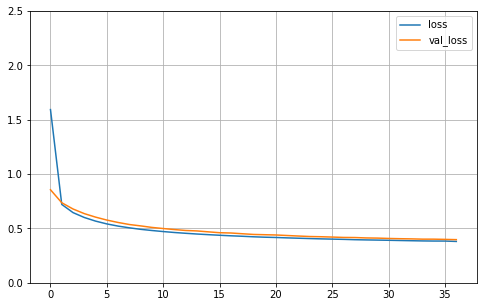

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2.5)
    plt.show()

plot_learning_curves(history)

In [20]:
model.evaluate(x_test_scaled, y_test, verbose=0)  # 准确率不高是因为模型搭建的太过于简单

0.40723225474357605